# Week 12 Homework: Machine Learning

In [21]:
# Dependencies:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
import statistics
import math
from scipy import stats
from sklearn.model_selection import train_test_split 

loans_df = pd.read_csv("loans_full_schema.csv")
loans_df.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

Machine learning is the means by which you apply statistical and computer science methods to a particular set of data. It takes a lot in order to even get to the stage in which a company to even start to use machine learning on their data. This process will help the client to understand patterns in the data, draw some conclusions, and predict future events. after the data is collected, it must first be properly stored, cleaning must be down on the data, and then exploratory analysis must be done in oder to complete the last two machine learning steps in the process. Why would a company want to use machine learning with their data?  When a company needs to predict the outcomes of their business, such as detecting fraud, determining patterns in customers that could determine possible cancellations or how to retain them. Why would a company not want to use machine learning with their data? The most important reason for a company is if they do not have good data. The "garbage in garbage out" theory is really put to the test here. Not only does the data have to be meaningful in order to gain insight, but it must be cleaned and maintained properly at every level before is can move onto the actual machine learning model. ML is very expensive for companies to invest in, and if you start out with terrible or messy data, then the model will not work properly and the company would have wasted, potentially, thousands of dollars. 

2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

In [22]:
# First I have to do some exploratory analysis to understand the dataset. 
# I've already taken a look at the df with the first 5 rows above. 
# Here I'm looking at the column names, the shape (10,000 rows by 55 columns), 
# some statistical data on each column just in case, and checking out the dtypes. 

print(loans_df.columns, 
      loans_df.shape,
      loans_df.describe(),
      loans_df.dtypes)

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [23]:
# Second step in preprocessing the data is to remove missing data. 
# looking for columns with null values. 
print(loans_df.isnull().sum())

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [24]:
#After looking at the data, there are tons of null values in joint account
# columns. This isn't something we need to drop, but just put in zeros for
# since that data is still needed. 
loans_df['annual_income_joint'] = loans_df['annual_income_joint'].fillna(0)
loans_df['debt_to_income_joint'] = loans_df['debt_to_income_joint'].fillna(0)

# I will drop these columns now, however, because they did not seem relavent. 
loans_df.drop(labels ='verification_income_joint', axis=1, inplace=True)
loans_df.drop(labels ='emp_title', axis=1, inplace=True)

#checking results:
loans_df.isnull().sum()

emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                    0
debt_to_income_joint                   0
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory

In [25]:
loans_df['months_since_90d_late'] = loans_df['months_since_90d_late'].fillna(0)
loans_df['months_since_last_delinq'] = loans_df['months_since_last_delinq'].fillna(0)
loans_df['months_since_last_credit_inquiry'] = loans_df['months_since_last_credit_inquiry'].fillna(0)
loans_df['debt_to_income'] = loans_df['debt_to_income'].fillna(0)
loans_df['emp_length'] = loans_df['emp_length'].fillna(0)

# I later decide to drop this column for low contribution to dataset, so I'm dropping it here:
loans_df.drop(labels ='num_accounts_120d_past_due', axis=1, inplace=True)

# checking results:
loans_df.isnull().sum()

emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_30d_past_due           0
num_active_d

In [26]:
# Checking value counts for columns. This will help me identify columns that don't need to be
# in my model. I will be looking for columns that have only a couple entries or categories,
# or that don't make sense to include in predicting loan defaults.

df_columns_list = loans_df.columns
for column in df_columns_list:
    print(loans_df[column].value_counts())

10.0    3332
0.0     1507
2.0      967
3.0      862
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64
CA    1330
TX     806
NY     793
FL     732
IL     382
NJ     338
OH     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
CO     235
WA     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      38
HI      35
AK      33
ME      26
DE      24
MT      24
VT      23
SD      20
WY      19
DC      19
ND      14
Name: state, dtype: int64
MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64
60000.00    383
50000.00    350
65000.00    314
70000.00    273
75000.00    260
           ... 
25560.00      1
63950.00      1
22104.00      1
34415.16      1
96774

In [27]:
# dropping some columns that also did not seem related to the topic. 
loans_df.drop(['disbursement_method','initial_listing_status','num_accounts_30d_past_due','current_accounts_delinq','issue_month','public_record_bankrupt','num_collections_last_12m','application_type','term'], axis=1,inplace=True)
loans_df.shape

(10000, 43)

In [28]:
#checking the dtypes:
loans_df.dtypes

emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts       

In [29]:
# using factorize in order to encode the object as an enumerated type or categorical variable. 
columns_to_factorize = ['homeownership','sub_grade','loan_purpose','grade',
                        'loan_status','verified_income','state']

for column in columns_to_factorize:
    loans_df[column+'_codes'] = pd.factorize(loans_df[column])[0]+1
    column_codes = pd.DataFrame(loans_df[column])
    column_codes[column+'_codes']=loans_df[column+'_codes']
    loans_df = loans_df.drop(column, axis=1)
    print(column_codes[[column, column+'_codes']].value_counts())

homeownership  homeownership_codes
MORTGAGE       1                      4789
RENT           2                      3858
OWN            3                      1353
dtype: int64
sub_grade  sub_grade_codes
B1         9                  647
B2         8                  638
B5         6                  631
C1         2                  597
B4         23                 581
C2         5                  572
A4         15                 568
B3         19                 540
A3         4                  504
C4         7                  503
C3         1                  501
A5         14                 485
A2         13                 480
C5         24                 480
A1         16                 422
D2         20                 323
D1         3                  319
D3         10                 311
D5         18                 262
D4         17                 231
E5         12                  91
E3         28                  73
E4         26                  73
E2         25 

In [30]:
# The Final step of train_test_split process. 

loans_X = loans_df.drop('account_never_delinq_percent',axis=1)
loans_y = loans_df[['account_never_delinq_percent']]

X_train, X_test, y_train, y_test = train_test_split(loans_X, loans_y, test_size=0.33, random_state=39)

print(y_train['account_never_delinq_percent'].value_counts())

100.0    3769
91.7       80
93.8       73
90.0       72
90.9       71
         ... 
29.4        1
57.7        1
61.3        1
74.5        1
65.0        1
Name: account_never_delinq_percent, Length: 254, dtype: int64


For ML preprocessing several steps are required. The first is to take an exploratory analysis of the dataframe you are working with. Second, you need to remove any missing data, especially whole columns or rows that are filled with only NANs. Third, you need to make sure that you are working with all the same data types which will only make your life easier down the road. This is because you need entire columns to be in the same dtype in order to do calculations or functions over the whole thing. The fourth and final step is the training and test sets. 

3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

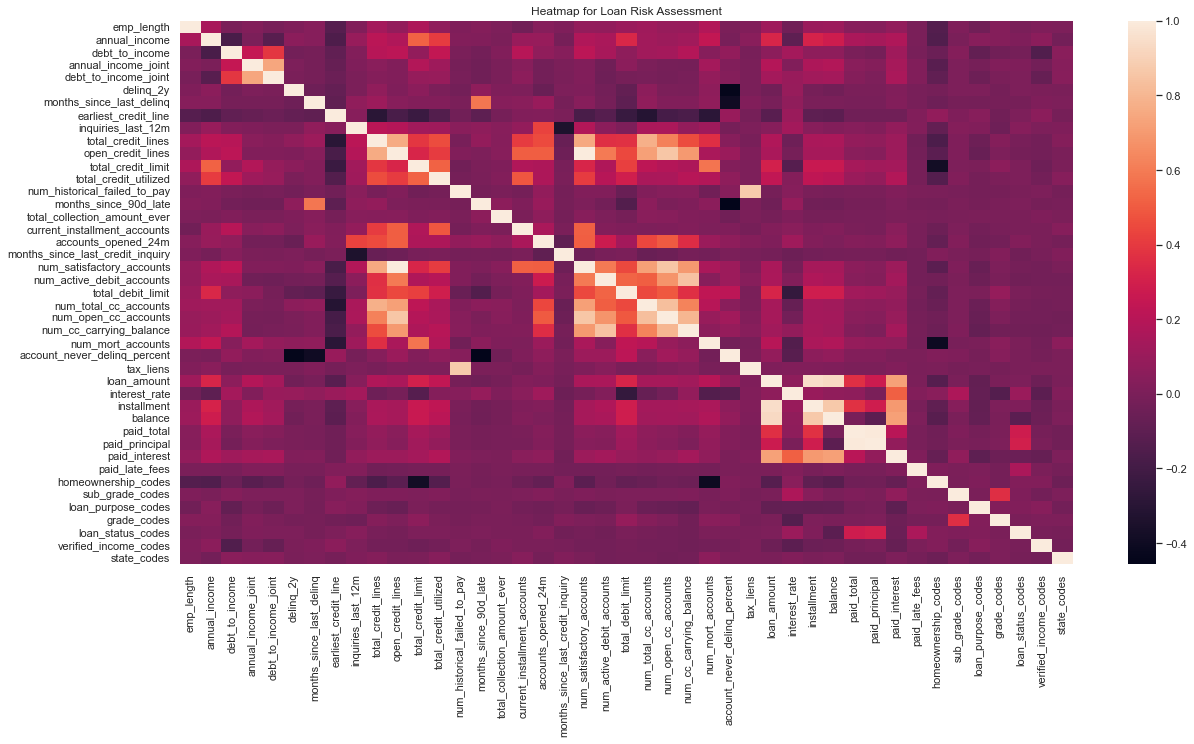

In [37]:
loans_corr = loans_df.corr()
loans_corr
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(loans_corr)
plt.title("Heatmap for Loan Risk Assessment")
plt.show()

I love using a heatmap to visualize correlation! I work with correlation in my daily life so this is a fantastic thing to learn. It was difficult at first to forsee how some pieces of data would clean up or if they would visualize well. Definately playing with your data for a while first to get comfortable with it and understand what you are looking at is necessary *before* you start cleaning. I had to go back thru my cleaning process a few times as I better learned what did and didn't make sense to correlate. I am surprised and interested to see the little pockets of higher correlation.

4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

Min loan amount: 1000
Max loan amount: 40000
Average loan amounts: 16361.9225


<AxesSubplot:title={'center':'Loan Amount distribution'}>

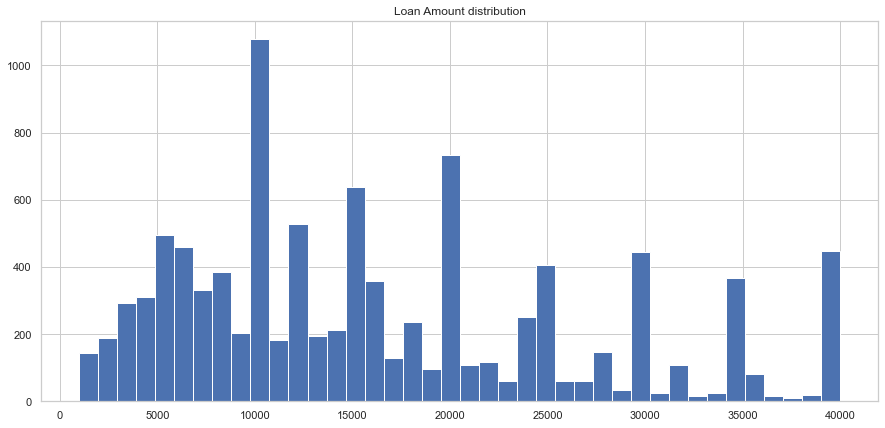

In [50]:
print("Min loan amount:",loans_df['loan_amount'].min())
print("Max loan amount:",loans_df['loan_amount'].max())
print("Average loan amounts:",loans_df['loan_amount'].mean())

plt.subplots(figsize=(15,7))
plt.title("Loan Amount distribution")
loans_df['loan_amount'].hist(bins = 40)

I chose 40 bins, because the min loan amount is 1000 dollars and the max is 40000 dollars. 40 bins divides the difference into 1000 dollar increments. It is easy to see in this visualization the the lending club certifies far more 10,000 dollar loans than any other amount, but loans between 5 and 20 thousand dollars comprise the bulk of its business.

5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

    a. Is there a better way to do this than with a lambda? 

    b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

In [51]:
# Creating Lists of Regions:
Northeast = ['PA','MD','DE','NJ','CT','RI','MA','ME','VT','NH','NY','DC'] 
South = ['WV','VA','KY','TN','AR','LA','MS','AL','GA','NC','SC','FL']
Midwest = ['MN','IA','MO','WI','IL','MI','IN','OH']
Pacific = ['ID','NV','UT','AZ','CA','WA','OR','HI','AK']
Plains = ['TX', 'NM', 'OK', 'KS','CO','NE','WY','SD','ND','MT' ]

In [53]:
# Now I will add an object type column back into my loans_df from the df I created to store
# factorized codes matched with their original values:
loans_df['state'] = column_codes['state']
loans_df.head()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,paid_interest,paid_late_fees,homeownership_codes,sub_grade_codes,loan_purpose_codes,grade_codes,loan_status_codes,verified_income_codes,state_codes,state
0,3.0,90000.0,18.01,0.0,0.00,0,38.0,2001,6,28,...,1015.19,0.0,1,1,1,1,1,1,1,NJ
1,10.0,40000.0,5.04,0.0,0.00,0,0.0,1996,1,30,...,150.49,0.0,2,2,2,1,1,2,2,HI
2,3.0,40000.0,21.15,0.0,0.00,0,28.0,2006,4,31,...,106.43,0.0,2,3,3,2,1,3,3,WI
3,1.0,30000.0,10.16,0.0,0.00,0,0.0,2007,0,4,...,566.15,0.0,2,4,2,3,1,2,4,PA
4,10.0,35000.0,57.96,57000.0,37.66,0,0.0,2008,7,22,...,754.80,0.0,2,1,4,1,1,1,5,CA


In [62]:
#starting timer
start = time.time()

# lambda approach   
def region(row):
    if row['state'] in Northeast:
        return 'northeast'
    if row['state'] in South:
        return 'south'   
    if row['state'] in Midwest:
        return 'midwest'
    if row['state'] in Pacific:
        return 'pacific'
    if row['state'] in Plains:
        return 'plains'
    
loans_df['region'] = loans_df.apply(lambda row: region(row), axis =1)

end = time.time()

print("Time taken to process lambda function approach",end-start)

Time taken to process lambda function approach 0.25459885597229004


In [75]:
# starting timer
start = time.time()

# np.select approach
conditions = [loans_df['state'].isin(Northeast),
             loans_df['state'].isin(South),
             loans_df['state'].isin(Midwest),
             loans_df['state'].isin(Pacific),
             loans_df['state'].isin(Plains)]

output = ['Northeast','South','Midwest','Pacific','Plains']

loans_df['region'] = np.select(conditions,output)

end = time.time()

print("Time taken to process np.select approach",end-start)

Time taken to process np.select approach 0.009727954864501953


Wow, lamda was significantly less performative than using the np.select function, taking over 20 times longer to execute! So, while very technical and effective, lambda should be used carefully.

6. Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

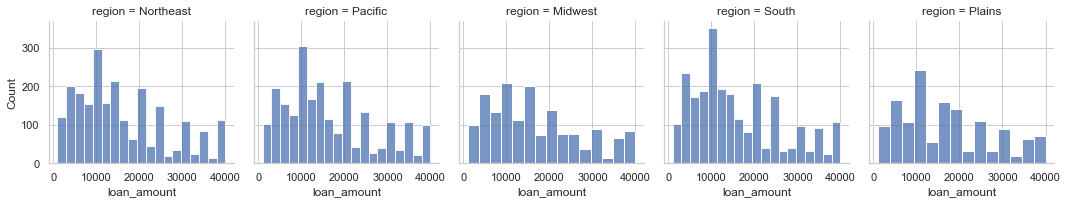

In [74]:
loans_region_df = loans_df[['region','loan_amount']]
#loans_region_df
g = sns.FacetGrid(loans_region_df, col='region')

g.map(sns.histplot, 'loan_amount')

plt.show()

Observations are as follows:
* The fewest loans are made in the Midwest, and Plains states take out the fewest high-dollar loans. However, cost-of-living is lowest in these states so that is expected.  
* Not only are there more loans made in the south, but the loan amounts are higher.
* The northeast and pacific regions show similar loan behavior.

7. Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful. 

Questions: 

- What is the main language you use in your daily routine?
- And what knowledge did you wish you had before starting?
- Michelle Lay, what is your first job in this career and how did you pivot to the more data engineer aspect?
- I often see ads for bootcamps or hackathons offered. Is any of that helpful in my career or would you recommend an outside source? Can this be added to resumes?
- Are there any certifications that are helpful to your current career?

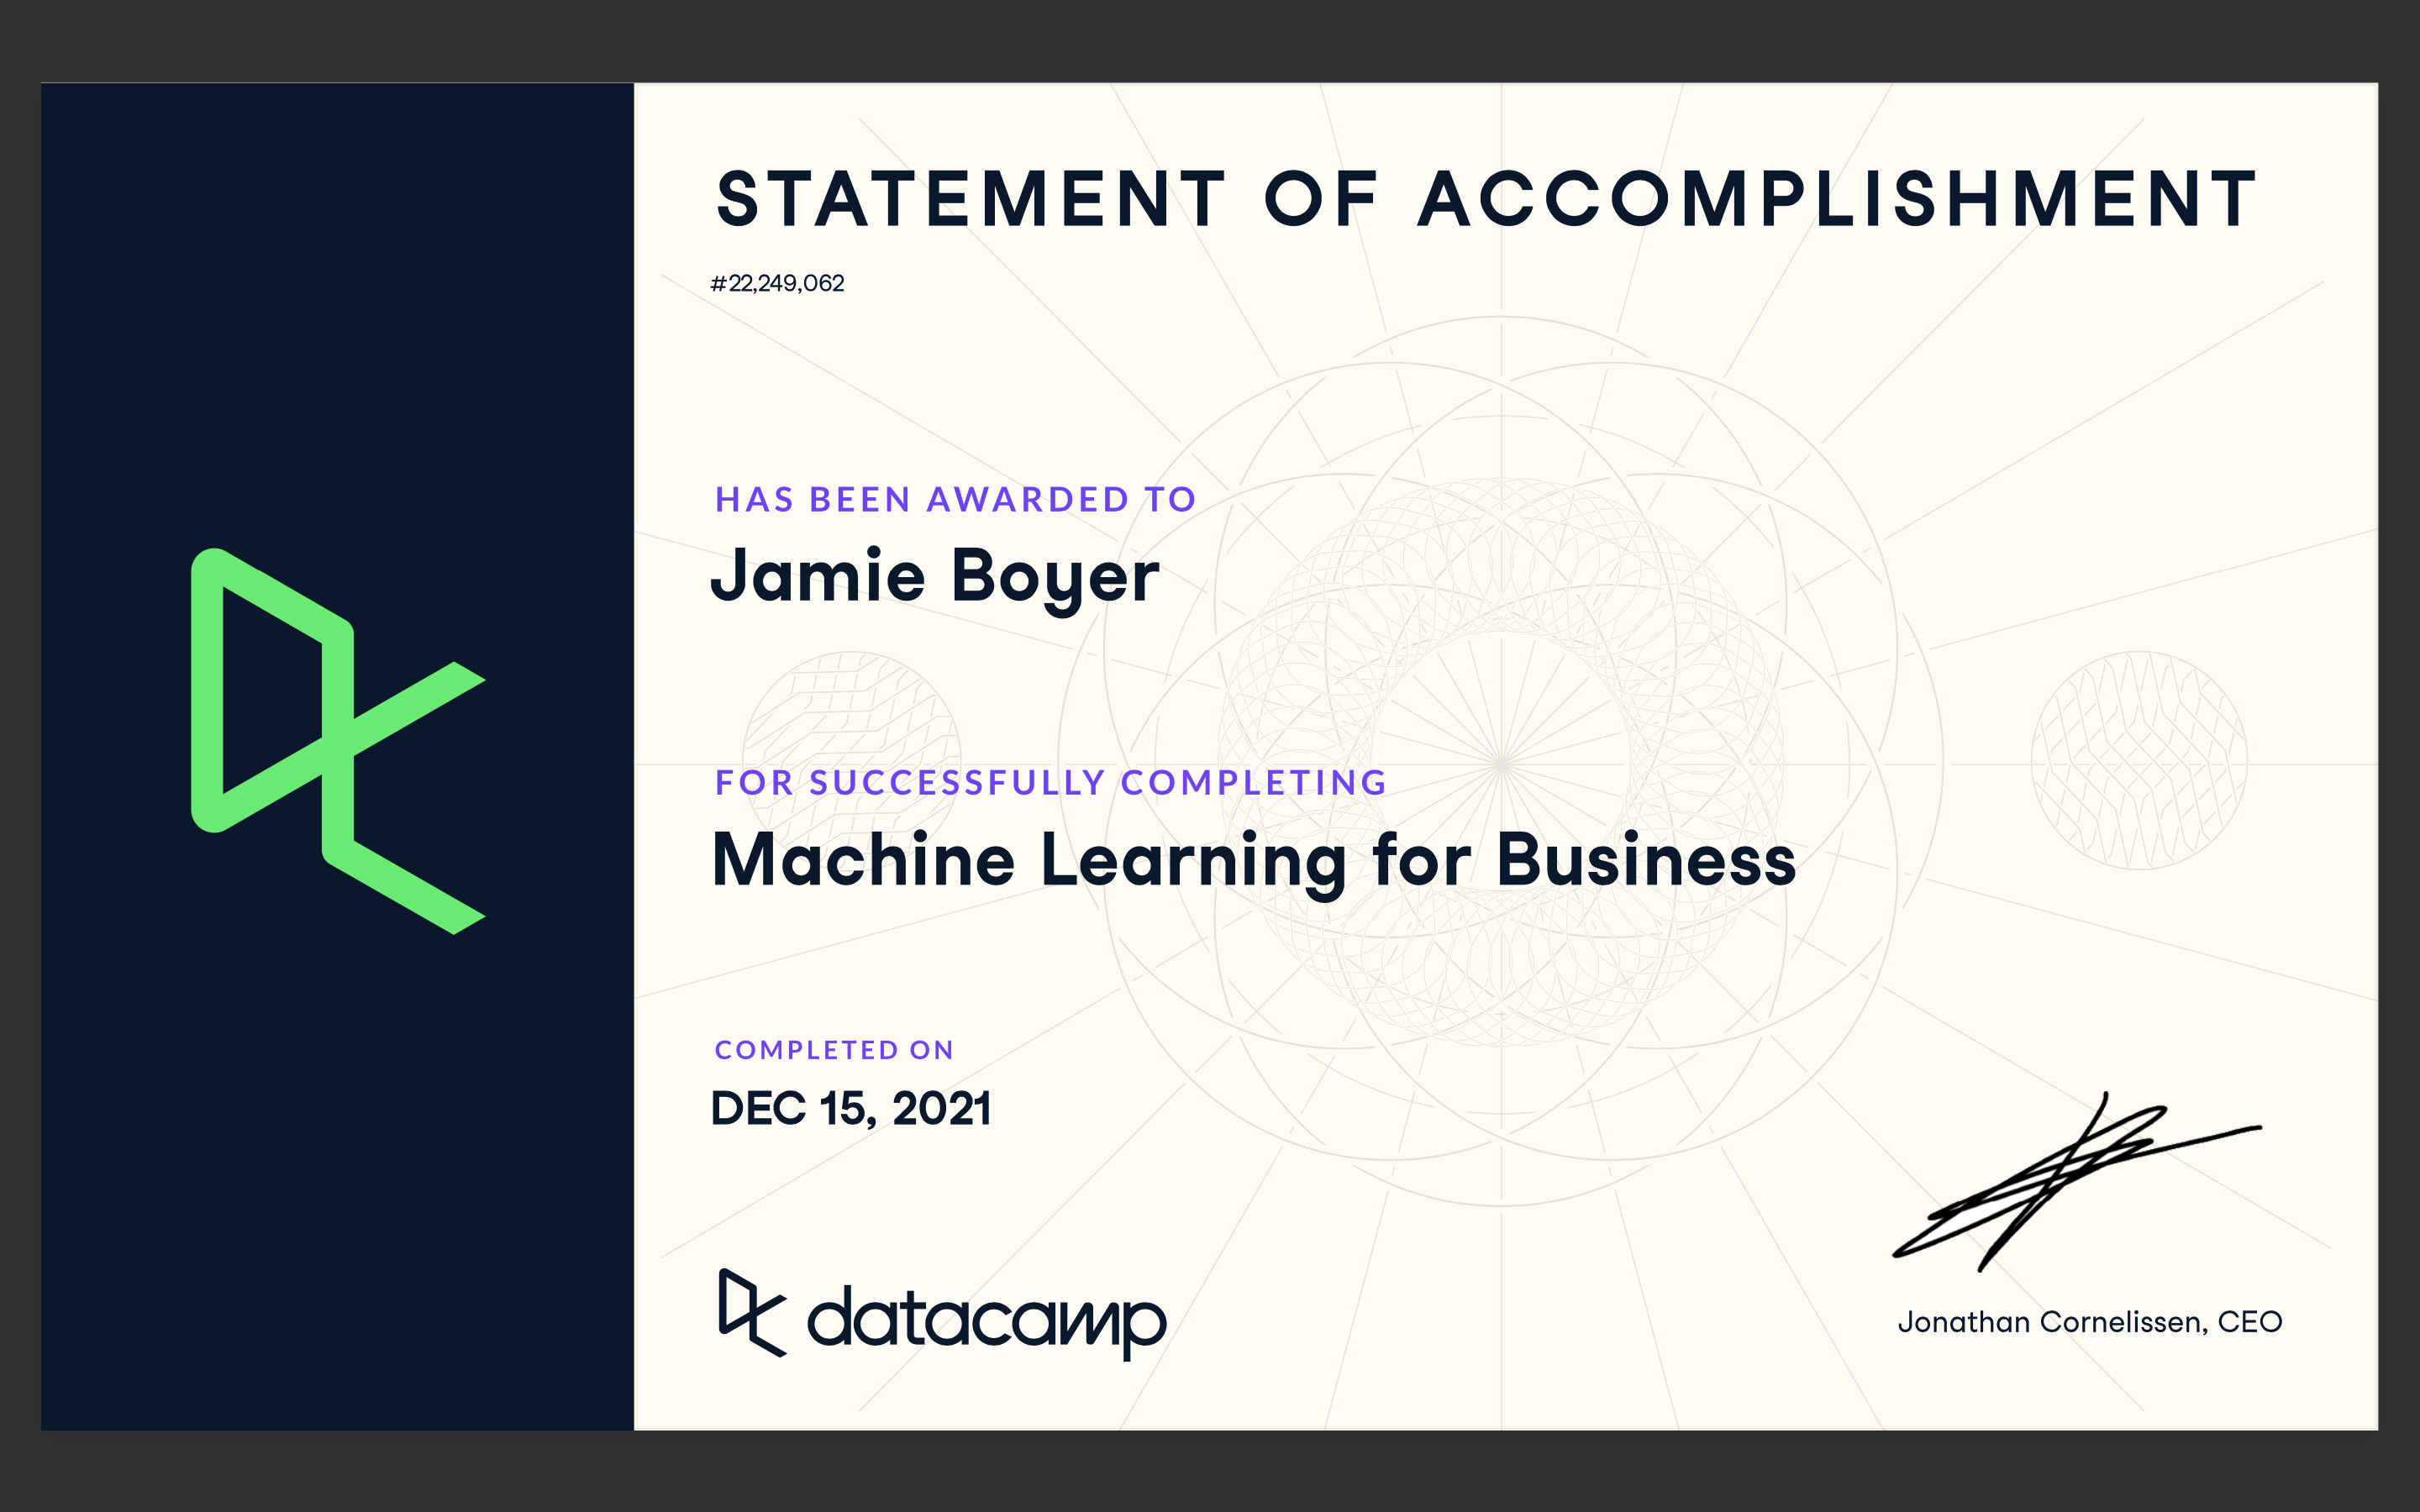

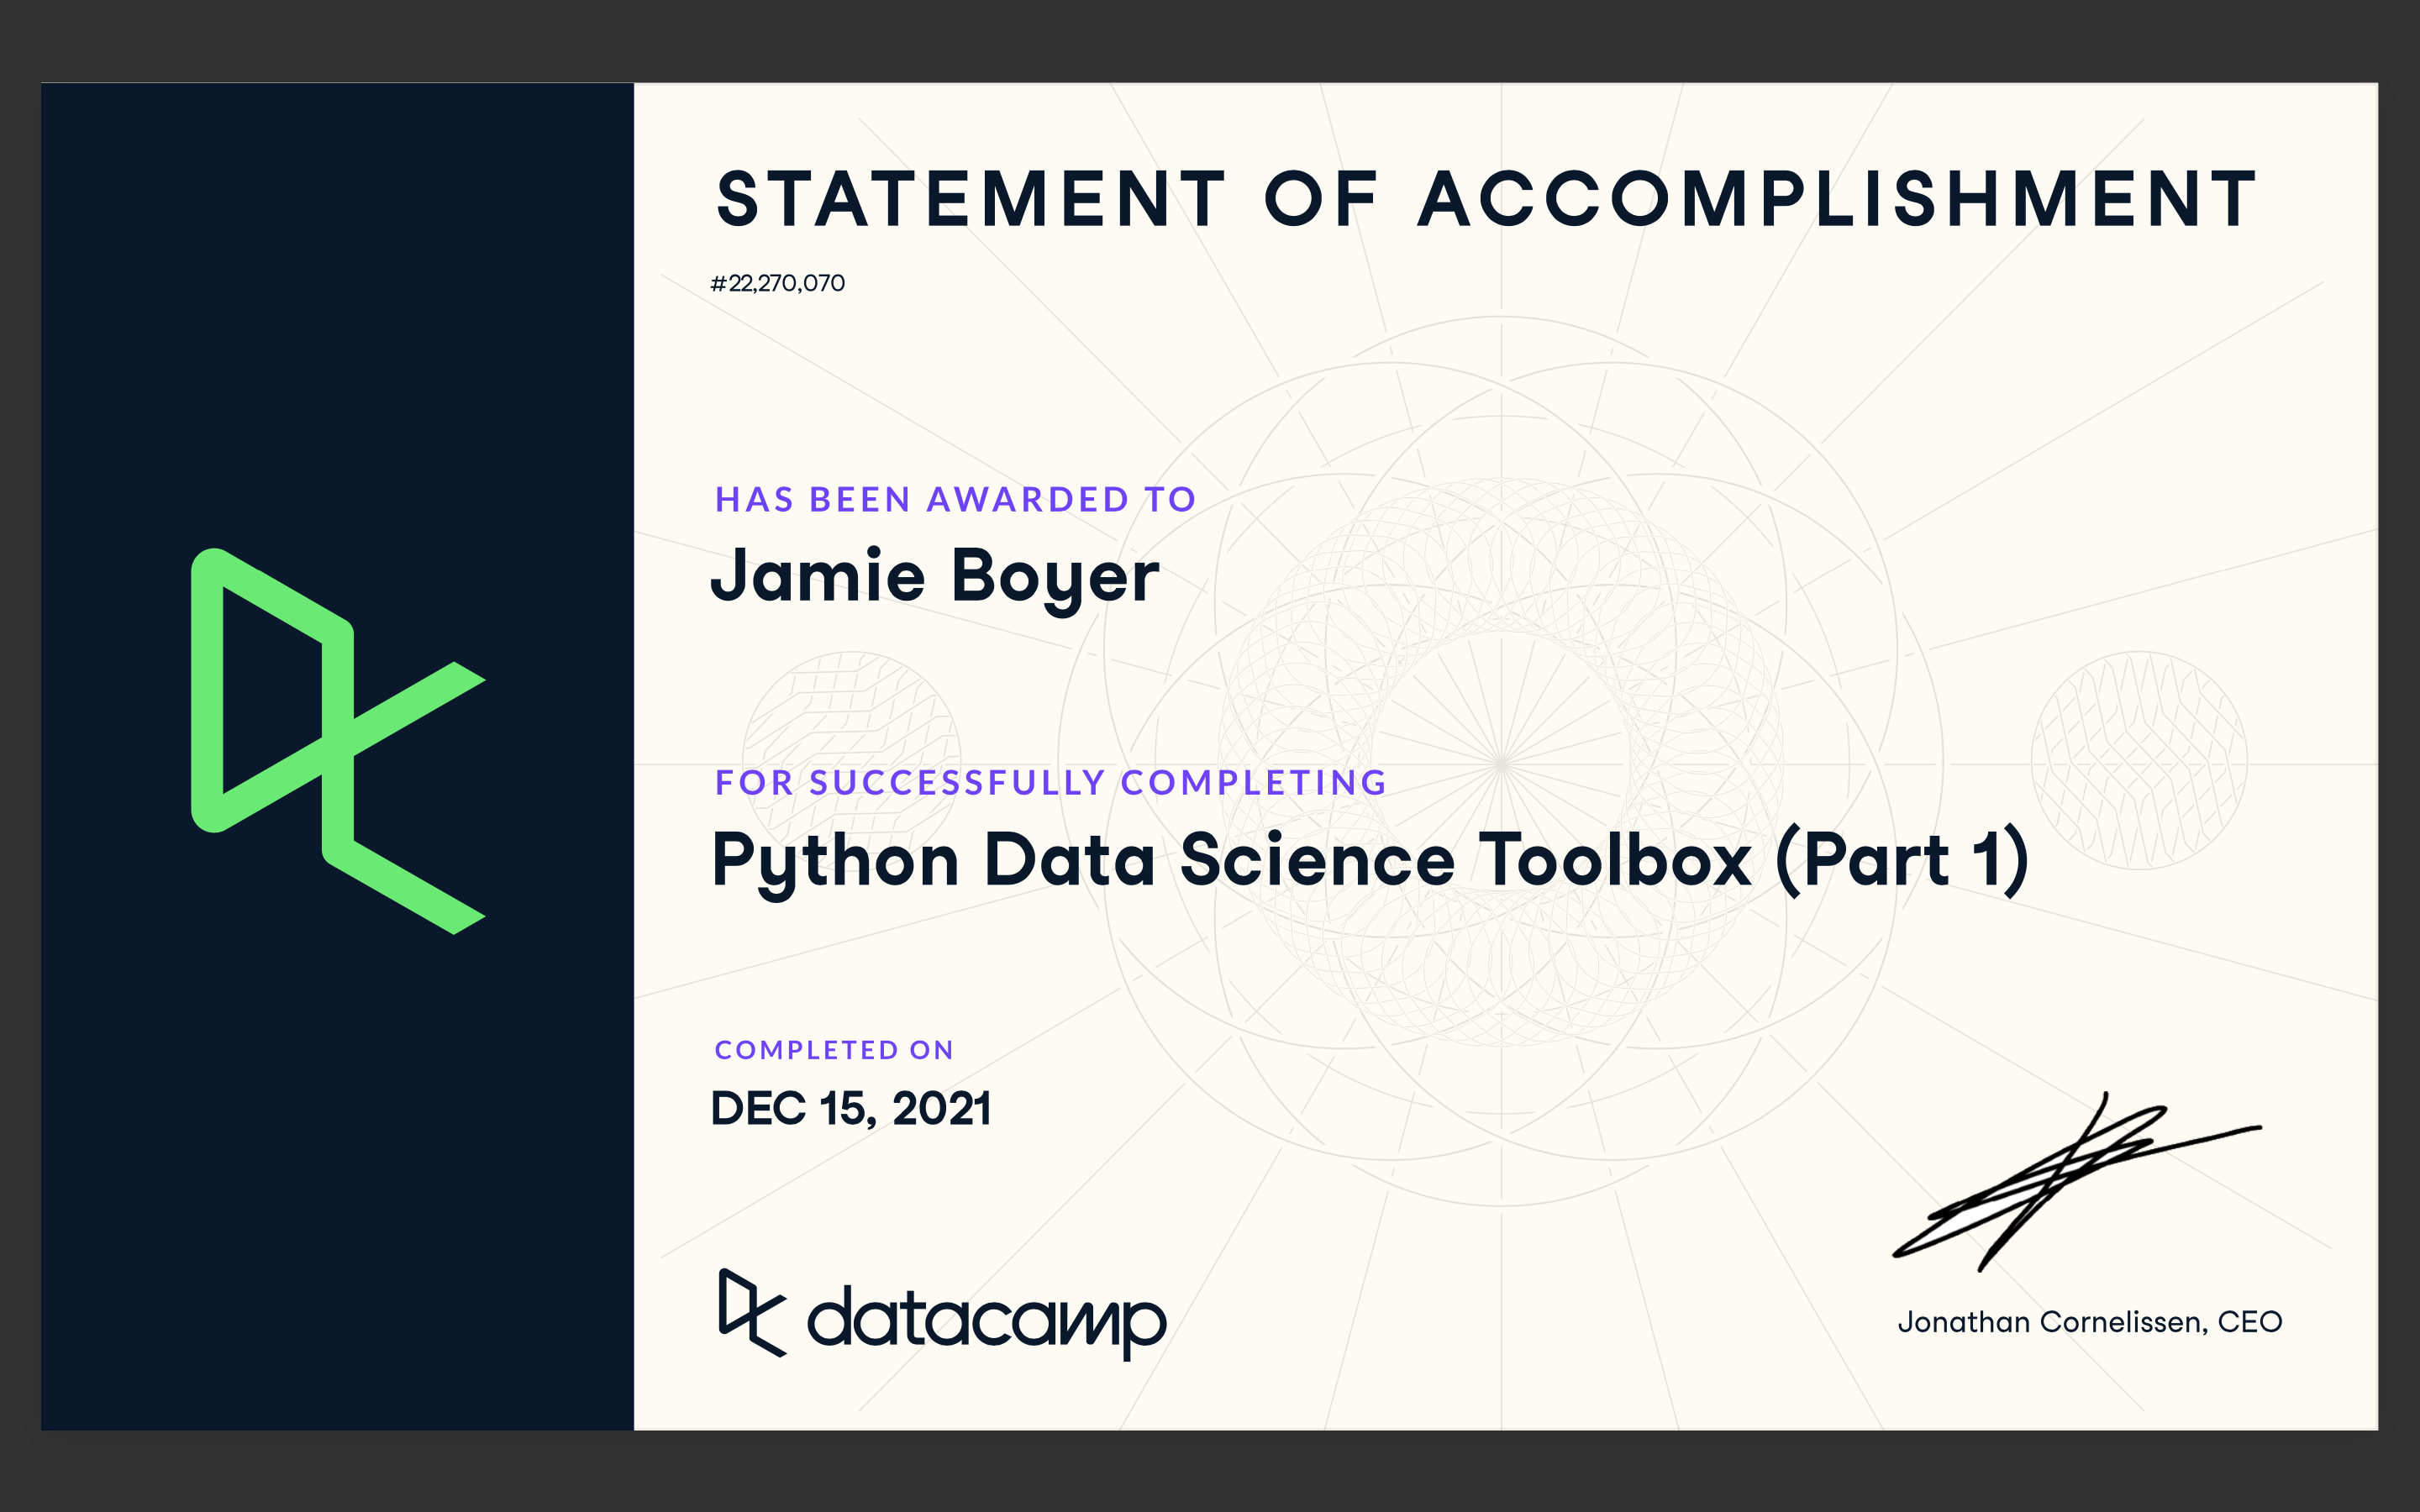